# Transformer: Attention is All You Need

- RNN이나 CNN을 필요로 하지 않는다.(positional encoding 사용)
- 인코더와 디코더로 구성되고 Attention 과정을 여러 레이어에서 반복.

> 번역 퀄리티 상승, 구조 병렬화로 훈련시간 줄어듬, 다른 task에서도 일반화가 잘 된다.

## 1.딥러닝 기반의 언어모델 발전 과정

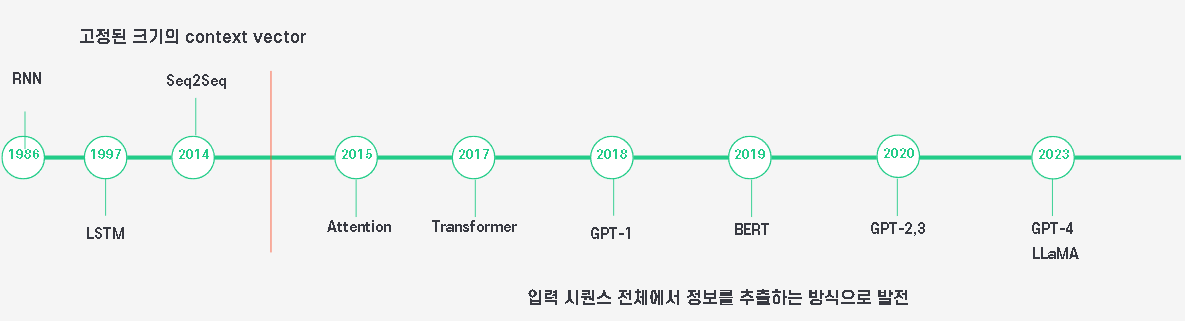

- 어텐션 메커니즘 등장 이후 트랜스포머의 아키텍쳐를 따르는 방식으로 고성능 모델 제안됨.
- GPT는 transformer의 decoder 아키텍쳐 활용
- BERT 는 transformer의 encoder 아키텍쳐 활용

## 2.등장 배경 (기존 seq2seq 모델의 한계)

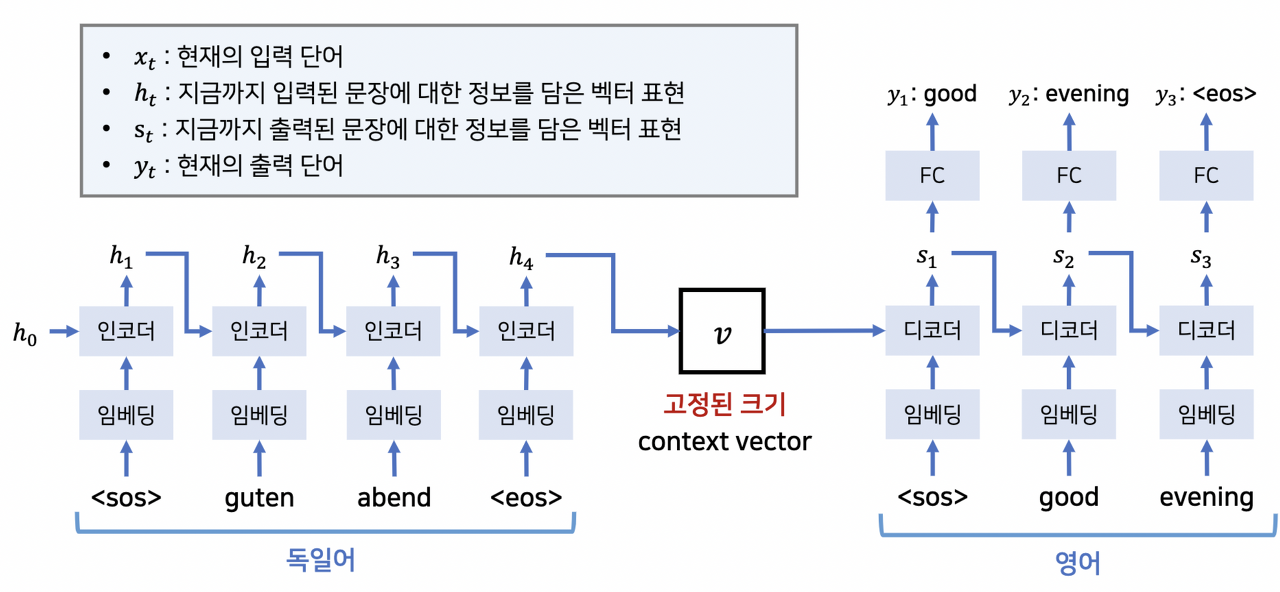

- context vector에 고정된 크기로 입력 문장 정보 압축 = 병목발생

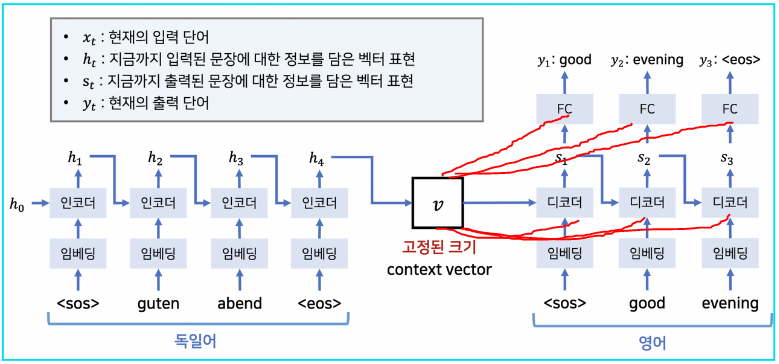

- RNN을 거치며 문장정보가 소실되는 문제 해결을 위해 제안 = 병목은 해결 못함

> 해결방안
- 소스 문장 전부를 입력으로 받으면 어떨까? = transformer

## 3.Transformer (구조 및 동작)

### 3.1 구조
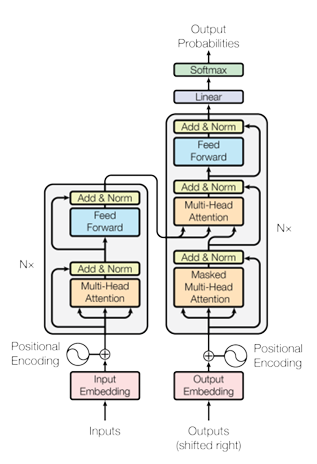

### 3.2 embedding
- 위치정보를 포함하고 있는 positional encoding을 사용

### 3.3 encoder
- 임베딩 이후 어텐션 진행.
- residual connection 사용, 잔여된 부분만 학습하도록 만들어서 초기 모델의 수렴속도 향상.
- Attention과 Normalization 반복

### 3.4 decoder
- encoder의 마지막 출력값을 decoder의 레이어에 넣어준다.
  - 마지막 encoder layer의 출력이 모든 decoder layer에 입력
- 두개의 attention 사용
  - 1. self-attention : 각각의 단어들이 서로서로 어떠한 가중치를 가지는지 구함
  - 2. encoder-decoder attenton : encoder의 출력정보 받아서 출력되고 있는 단어와 소스 문장에서의 연관성
- 모든 출력 dim = 512

### 3.5 multi-head Attention


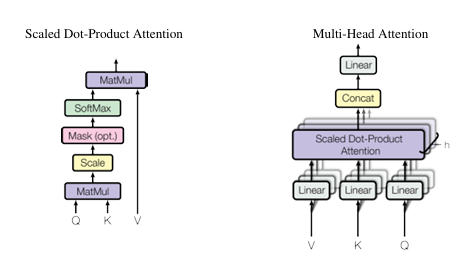

- encoder & decoder 는 multi-head attention layer 사용
- h개의 서로 다른 V, K, Q 구분
  - 서로 다른 attention 컨셉 구성, 더 다양한 특징 학습 유도

- 입력 dim, 출력 dim 동일해야함
  - concat 수행

- 각 attention의 위치마다 V, K, Q를 어떻게 사용할 지에 대한 방법이 변경, 구조는 동일하다.
#### **Scaled Dot-Product Attention**
- Q(query), K(key), V(value) 입력요소 필요.
  - Q : 물어보는 주체(질문자)
  - K : 물어보는 대상
- 가중치가 적용된 attention value 구할 수 있다.




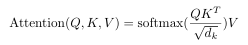

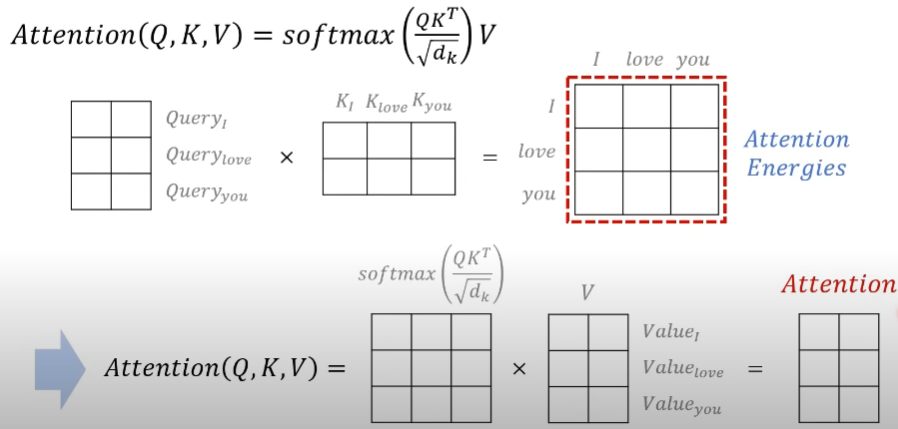

- attention energy = 각각의 단어가 각 키값에 대해서 얼마나 연관성있는지
- softmax를 취하여 각 값을 확률값으로 만들어 준 뒤 Attentin value matrix 구함
- 입력된 Q, K, V 차원과 Attention value 차원 동일

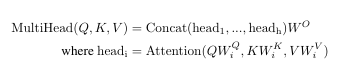

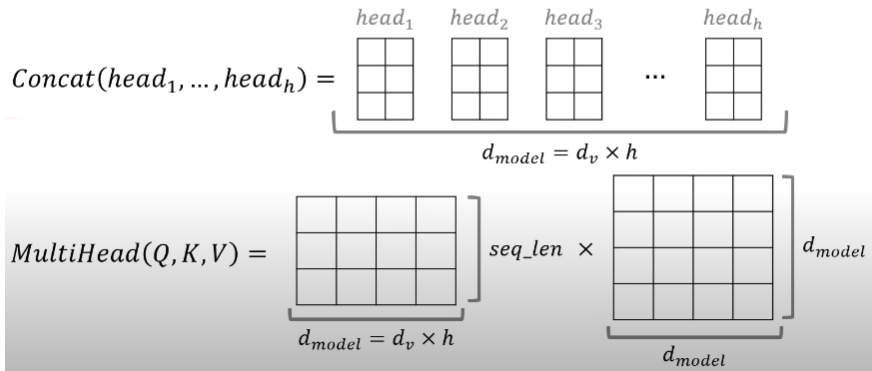

- 각각의 head에서 attention 수행 후 이어붙여서 원래 임베딩 차원(d<sub>model</sub>)과 동일한 차원을 가지게 된다.
- W 가중치값 (d<sub>model</sub> X d<sub>model</sub>) matrix 곱해주어 dimension 동일하게 유지된다.


### Positional Encoding

- 주기함수를 활용, 각 단어의 상대적인 위치 정보를 입력

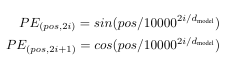

- 다른 연구에서는 학습이 가능한 형태의 별도의 임베딩 레이어를 사용한다.
- pos : 각각의 단어 번호
- i  : 각각 단어에 대한 임베딩 위치